In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./products.csv")
df.head(5)

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [3]:
df.shape

(124428, 2)

In [4]:
df = df.dropna()
df.shape

(124428, 2)

In [5]:
desc = df.head(300)

In [6]:
desc["product_description"].head(50)

0     Not only do angles make joints stronger, they ...
1     BEHR Premium Textured DECKOVER is an innovativ...
2     Classic architecture meets contemporary design...
3     The Grape Solar 265-Watt Polycrystalline PV So...
4     Update your bathroom with the Delta Vero Singl...
5     Achieving delicious results is almost effortle...
6     The Quantum Adjustable 2-Light LED Black Emerg...
7     The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8     Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9     Valley View Industries Metal Stakes (4-Pack) a...
10    Recycler 22 in. Personal Pace Variable Speed S...
11    The 96 in. wide Caramel Simple Weave Rollup Ba...
12    The InSinkErator SinkTop Switch Single Outlet ...
13    The Rubbermaid 1-Step Folding Plastic Step Sto...
14    Backyard X-Scapes, Inc. uses the finest bamboo...
15    Make grilling great with this handsome and fun...
16    The MD Building Products 36 in. x 36 in. x 1/5...
17    This classic plastic sprinkler head that f

In [7]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(desc['product_description'])

In [8]:
tfidf_matrix

<300x6627 sparse matrix of type '<class 'numpy.float64'>'
	with 20969 stored elements in Compressed Sparse Row format>

C:\Users\tanks\anaconda3\envs\DAB300\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


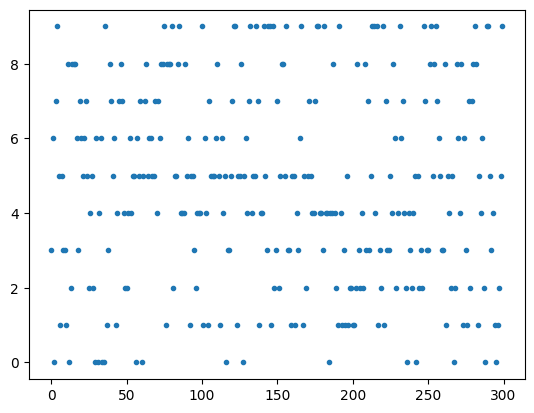

In [9]:
KM = tfidf_matrix

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(KM)
plt.plot(y_kmeans, ".")
plt.show()

In [10]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [11]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(tfidf_matrix)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 water
 concrete
 insulation
 use
 heater
 used
 ft
 tape
 fiberglass
 easy
Cluster 1:
 wood
 porcelain
 outdoor
 recommended
 tile
 resistant
 piece
 commercial
 products
 indoor
Cluster 2:
 wall
 storage
 ft
 panels
 easy
 piece
 add
 plate
 shelves
 single
Cluster 3:
 air
 cooking
 wash
 water
 filter
 cycle
 heat
 control
 ft
 window
Cluster 4:
 volt
 lithium
 ion
 battery
 power
 compact
 20
 max
 48
 better
Cluster 5:
 rug
 vary
 shades
 order
 slightly
 product
 size
 bamboo
 natural
 window
Cluster 6:
 light
 watt
 led
 bulbs
 power
 lighting
 low
 bulb
 plan
 000
Cluster 7:
 metal
 shelf
 unit
 adjustable
 grill
 ziplevel
 shelves
 nozzle
 steel
 durable
Cluster 8:
 door
 nickel
 design
 pull
 cabinet
 center
 satin
 easy
 mount
 installation
Cluster 9:
 cutting
 easy
 steel
 joe
 lightweight
 pliers
 height
 grass
 ladder
 blade


In [12]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = tfidf.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [13]:
show_recommendations("cutting tool")

Cluster 9:
 cutting
 easy
 steel
 joe
 lightweight
 pliers
 height
 grass
 ladder
 blade


In [14]:
show_recommendations("spray paint")

Cluster 0:
 water
 concrete
 insulation
 use
 heater
 used
 ft
 tape
 fiberglass
 easy


In [15]:
show_recommendations("steel drill")

Cluster 7:
 metal
 shelf
 unit
 adjustable
 grill
 ziplevel
 shelves
 nozzle
 steel
 durable


In [16]:
show_recommendations("water")

Cluster 0:
 water
 concrete
 insulation
 use
 heater
 used
 ft
 tape
 fiberglass
 easy
